In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

In [4]:
import glob

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.image as mpimg

In [7]:
%matplotlib inline

In [8]:
import seaborn as sns

In [9]:
import matplotlib.style as style

In [10]:
from skimage import exposure, color

In [11]:
import cv2

In [12]:
from tqdm import tqdm

In [13]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [14]:
style.use('ggplot') 

In [15]:
df = pd.read_csv("Dataset/labels.csv")

In [16]:
df

,index,class
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
1296,1297,1
1297,1298,1
1298,1299,1
1299,1300,1


In [17]:
image_list = glob.glob("Dataset/rgb/*.png")

In [18]:
image_list

['Dataset/rgb\\rgb_0001.png',
 'Dataset/rgb\\rgb_0002.png',
 'Dataset/rgb\\rgb_0003.png',
 'Dataset/rgb\\rgb_0004.png',
 'Dataset/rgb\\rgb_0005.png',
 'Dataset/rgb\\rgb_0006.png',
 'Dataset/rgb\\rgb_0007.png',
 'Dataset/rgb\\rgb_0008.png',
 'Dataset/rgb\\rgb_0009.png',
 'Dataset/rgb\\rgb_0010.png',
 'Dataset/rgb\\rgb_0011.png',
 'Dataset/rgb\\rgb_0012.png',
 'Dataset/rgb\\rgb_0013.png',
 'Dataset/rgb\\rgb_0014.png',
 'Dataset/rgb\\rgb_0015.png',
 'Dataset/rgb\\rgb_0016.png',
 'Dataset/rgb\\rgb_0017.png',
 'Dataset/rgb\\rgb_0018.png',
 'Dataset/rgb\\rgb_0019.png',
 'Dataset/rgb\\rgb_0020.png',
 'Dataset/rgb\\rgb_0021.png',
 'Dataset/rgb\\rgb_0022.png',
 'Dataset/rgb\\rgb_0023.png',
 'Dataset/rgb\\rgb_0024.png',
 'Dataset/rgb\\rgb_0025.png',
 'Dataset/rgb\\rgb_0026.png',
 'Dataset/rgb\\rgb_0027.png',
 'Dataset/rgb\\rgb_0028.png',
 'Dataset/rgb\\rgb_0029.png',
 'Dataset/rgb\\rgb_0030.png',
 'Dataset/rgb\\rgb_0031.png',
 'Dataset/rgb\\rgb_0032.png',
 'Dataset/rgb\\rgb_0033.png',
 'Dataset/

In [19]:
df["imagePath"] = image_list

In [20]:
df

,index,class,imagePath
0,1,1,Dataset/rgb\rgb_0001.png
1,2,1,Dataset/rgb\rgb_0002.png
2,3,1,Dataset/rgb\rgb_0003.png
3,4,1,Dataset/rgb\rgb_0004.png
4,5,1,Dataset/rgb\rgb_0005.png
...,...,...,...
1296,1297,1,Dataset/rgb\rgb_1297.png
1297,1298,1,Dataset/rgb\rgb_1298.png
1298,1299,1,Dataset/rgb\rgb_1299.png
1299,1300,1,Dataset/rgb\rgb_1300.png


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      1301 non-null   int64 
 1   class      1301 non-null   int64 
 2   imagePath  1301 non-null   object
dtypes: int64(2), object(1)
memory usage: 30.6+ KB


In [22]:
label_dict = {
    1: "Standing", 
    2: "Sitting", 
    3: "Lying", 
    4: "Bending", 
    5: "Crawling", 
    0: "Empty"
}

In [23]:
def create_label(row):
    return label_dict[row["class"]]

In [24]:
df["label"] = df.apply(create_label, axis=1)

In [25]:
df.sample(50)

,index,class,imagePath,label
321,322,3,Dataset/rgb\rgb_0322.png,Lying
374,375,3,Dataset/rgb\rgb_0375.png,Lying
1282,1283,1,Dataset/rgb\rgb_1283.png,Standing
634,635,1,Dataset/rgb\rgb_0635.png,Standing
1075,1076,3,Dataset/rgb\rgb_1076.png,Lying
931,932,2,Dataset/rgb\rgb_0932.png,Sitting
512,513,1,Dataset/rgb\rgb_0513.png,Standing
327,328,3,Dataset/rgb\rgb_0328.png,Lying
793,794,1,Dataset/rgb\rgb_0794.png,Standing
638,639,1,Dataset/rgb\rgb_0639.png,Standing


In [26]:
df["label"].value_counts()

Standing    442
Sitting     395
Lying       344
Bending      78
Crawling     42
Name: label, dtype: int64

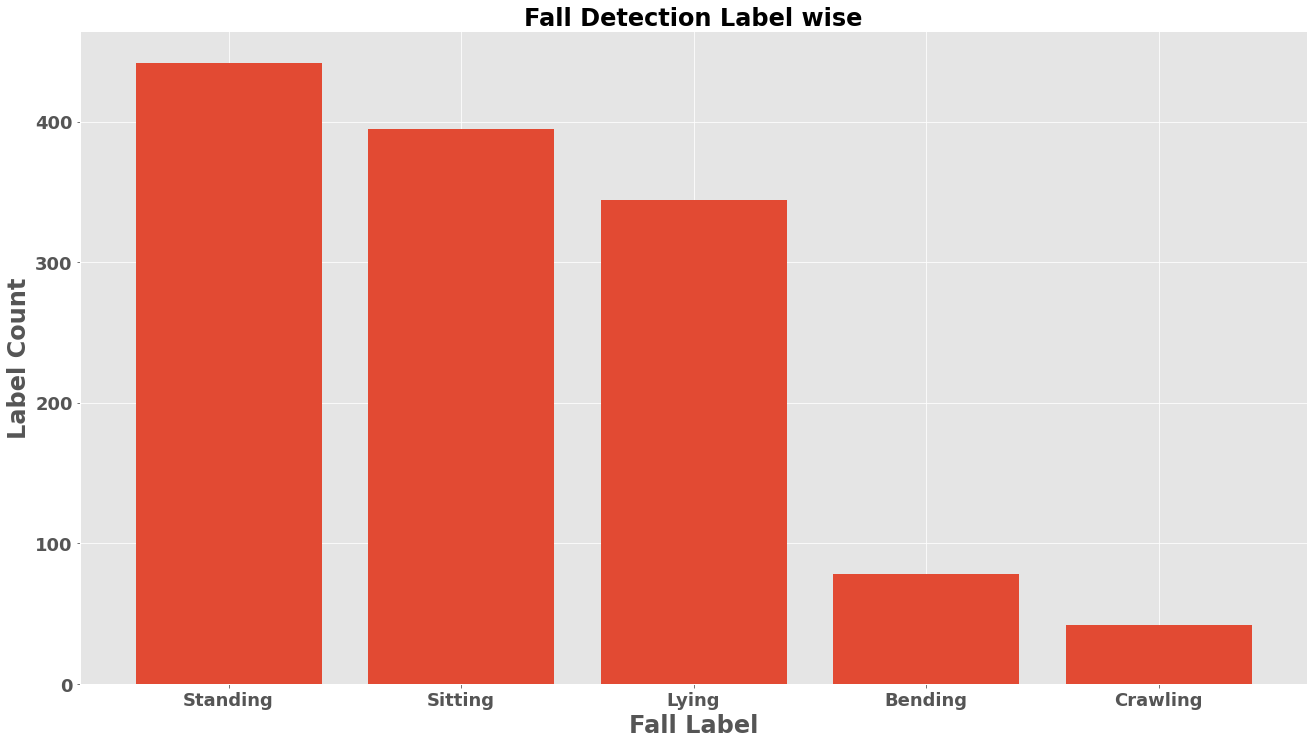

In [27]:
plt.figure(figsize=(22,12))
plt.bar(x=df["label"].value_counts().index, height=df["label"].value_counts().values)
plt.title("Fall Detection Label wise", fontsize = 24, weight = 'bold')
plt.xlabel("Fall Label", fontsize = 24, weight = 'bold')
plt.xticks( fontsize = 18, weight = 'bold')
plt.ylabel("Label Count", fontsize = 24, weight = 'bold')
plt.yticks( fontsize = 18, weight = 'bold')
plt.show()

In [28]:
dataset_dir = "Dataset/rgb/"

In [29]:
r_int = np.random.randint(0, len(image_list))

In [30]:
img_path = df.iloc[r_int]["imagePath"]

In [31]:
img_path

'Dataset/rgb\\rgb_1019.png'

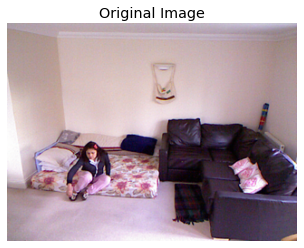

In [32]:
img = mpimg.imread(img_path)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [33]:
height, width, channels = img.shape
print(f"Image Height:", height)
print(f"Image Width:", width)
print(f"Image Channels:", channels)
print(f"Image Shape: {height} x {width} x {channels}")

Image Height: 240
Image Width: 320
Image Channels: 3
Image Shape: 240 x 320 x 3


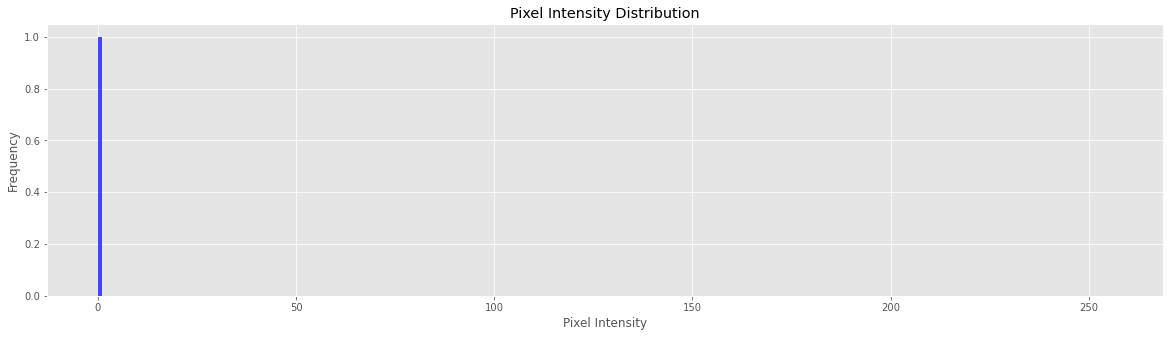

In [34]:
plt.figure(figsize = (20, 5))
plt.hist(img.flatten(), bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

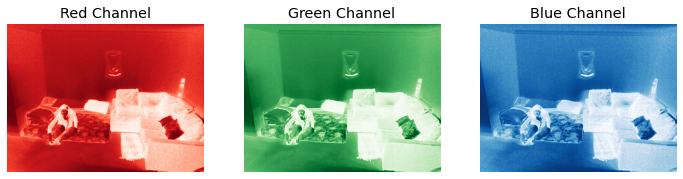

In [35]:
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

# Display each channel
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.show()

C:\ProgramData\Anaconda3-2019\envs\python39\envs\python39\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


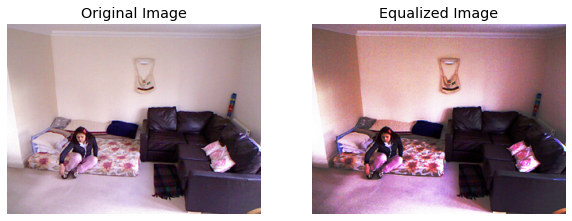

In [36]:
img_eq = exposure.equalize_hist(img)

# Display original and equalized images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_eq)
axes[1].set_title('Equalized Image')
axes[1].axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


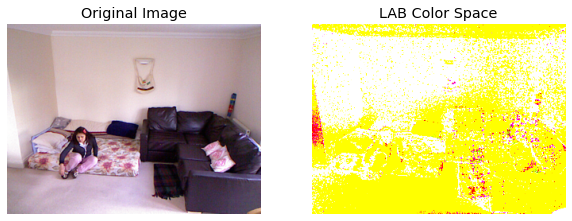

In [37]:
lab_img = color.rgb2lab(img)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(lab_img)
axes[1].set_title('LAB Color Space')
axes[1].axis('off')

plt.show()

In [38]:
def edge_and_cut(img):
    emb_img = img.copy()
    edges = cv2.Canny(img, 100, 200)
    edge_coors = []
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            if edges[i][j] != 0:
                edge_coors.append((i, j))
    
    row_min = edge_coors[np.argsort([coor[0] for coor in edge_coors])[0]][0]
    row_max = edge_coors[np.argsort([coor[0] for coor in edge_coors])[-1]][0]
    col_min = edge_coors[np.argsort([coor[1] for coor in edge_coors])[0]][1]
    col_max = edge_coors[np.argsort([coor[1] for coor in edge_coors])[-1]][1]
    new_img = img[row_min:row_max, col_min:col_max]
    
    emb_img[row_min-10:row_min+10, col_min:col_max] = [255, 0, 0]
    emb_img[row_max-10:row_max+10, col_min:col_max] = [255, 0, 0]
    emb_img[row_min:row_max, col_min-10:col_min+10] = [255, 0, 0]
    emb_img[row_min:row_max, col_max-10:col_max+10] = [255, 0, 0]
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image', fontsize=24)
    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Canny Edges', fontsize=24)
    ax[2].imshow(emb_img, cmap='gray')
    ax[2].set_title('Bounding Box', fontsize=24)
    plt.show()

In [39]:
def load_image(image_id):
    image = cv2.imread(image_id)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [40]:
train_images = df["imagePath"][:1000].progress_apply(load_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

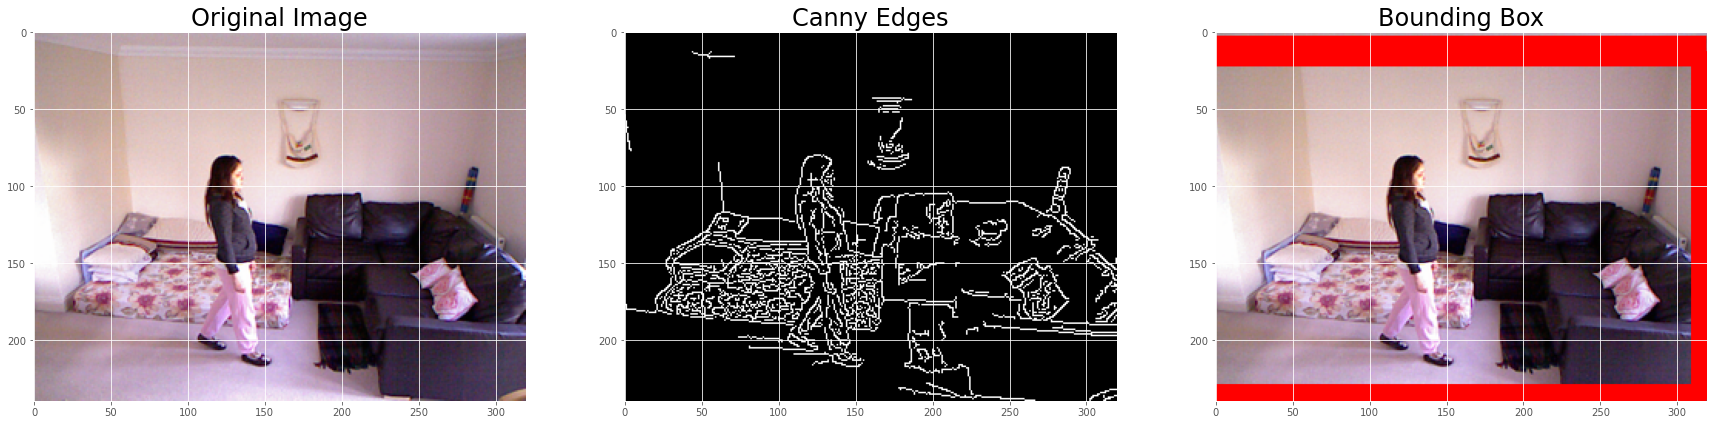

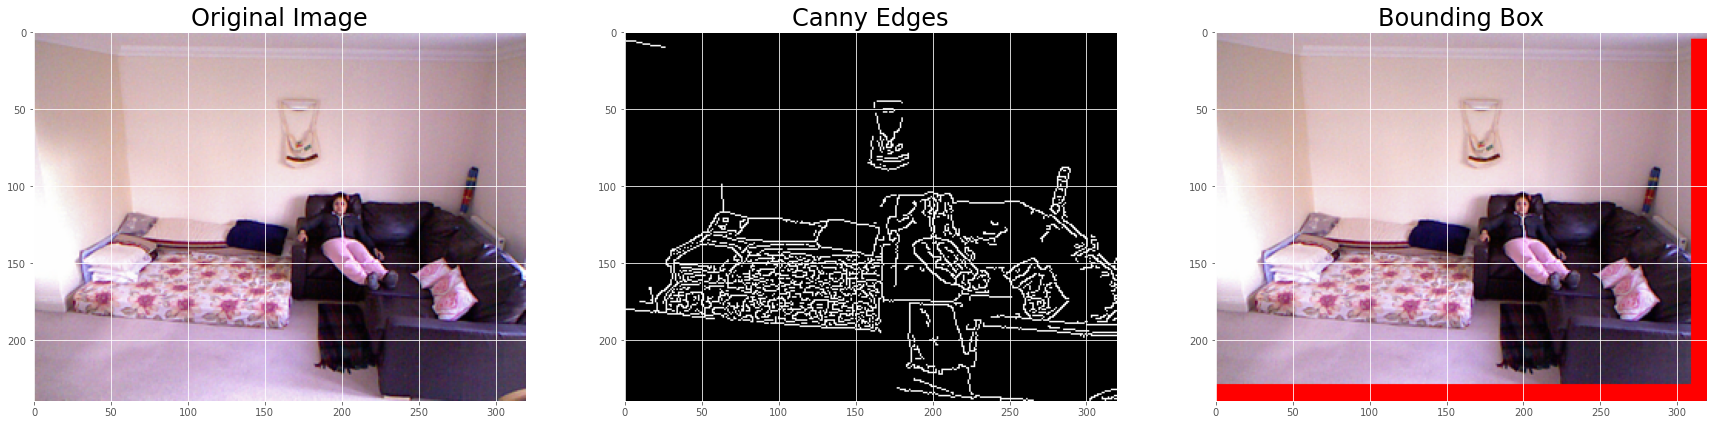

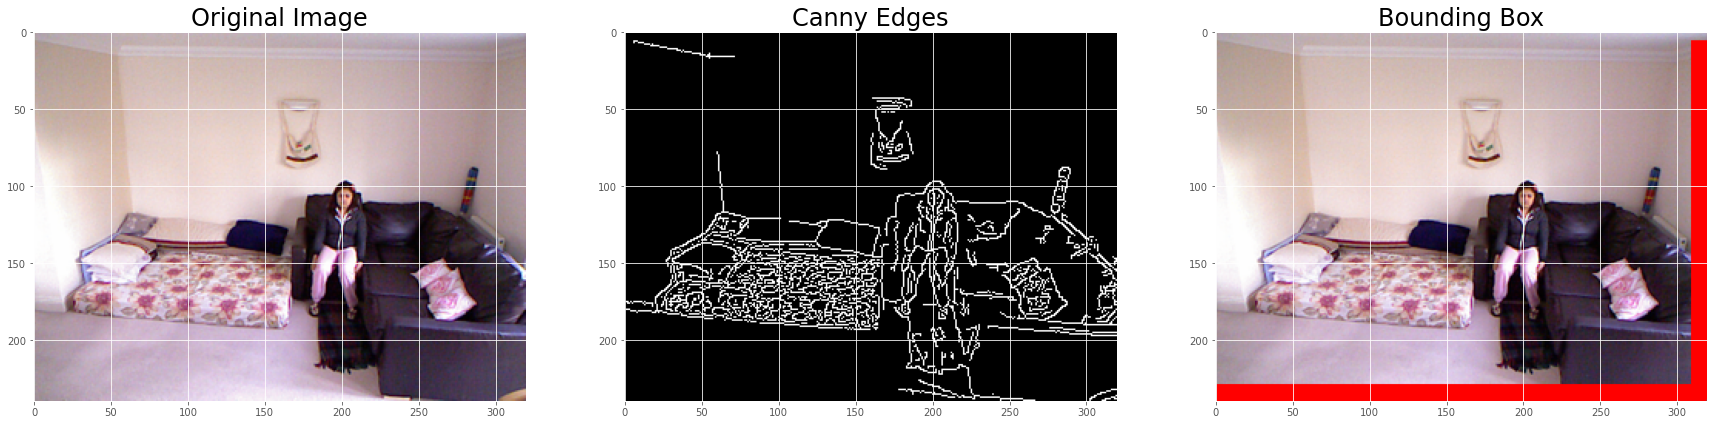

In [41]:
edge_and_cut(train_images[100])
edge_and_cut(train_images[200])
edge_and_cut(train_images[700])